the python version is 3.7.10


'\npentagon_xy = [pentagon_p1_xy, pentagon_p2_xy,\n               ??3, ??4, \n               ??5, ??1]\npentagon = LineString(pentagon_xy)\n#\nmotif_fill(pentagon, \'lightblue\', 10, 0.5)\nmotif_line(pentagon, \'blue\', 10, 1.0) \n#\nplt.savefig("./png/1-2B.png",format="png",dpi=150)\n#\n'

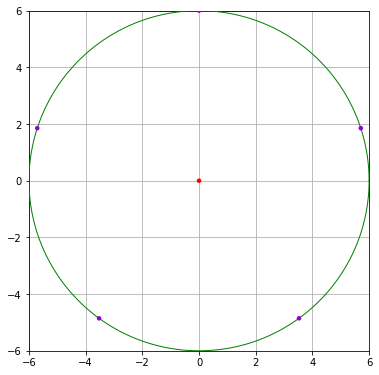

In [1]:
# (home)/00-Penta-Flower/
# flower-stu-1-2
# 2021-09-19
#
# python 3.8.10
# run on replit.com
# run on mybinder.org
#
# python 3.9.1
# run on miniconda 3 JupyterLab
#
# 要執行本程式, 請按上方run▶
#
# to fix matplotlib warning
import os
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
#
from platform import python_version
print('the python version is',python_version())
#
import numpy as np
# 載入繪圖模組 pyplot, 重新命名為 plot
import matplotlib.pyplot as plt
#
import json
from shapely import affinity
from shapely.ops import unary_union
from shapely.geometry  import LineString, Point, Polygon, shape
#
# ---------------------------------------------
#
def set_graphic_area(width,height) :
        
    cm2inch = 1/2.54    # inch per cm
    #
    # define graphic area
    #
    left_margin = 1.0   # cm
    right_margin = 1.0  # cm
    #
    figure_width  = width  # cm , from xmin to xmax
    figure_height = height # cm , from ymin to ymax
    #
    top_margin = 1.0    # cm
    bottom_margin = 1.0 # cm
    #
    box_width = left_margin + figure_width + right_margin   # cm
    box_height = top_margin + figure_height + bottom_margin # cm
    #
    top_value    = 1.0 - top_margin / box_height
    bottom_value = bottom_margin / box_height
    left_value   = left_margin / box_width
    right_value  = 1.0 - right_margin / box_width
    #
    return (box_width*cm2inch,box_height*cm2inch,top_value,bottom_value,left_value,right_value,width)
#
# end of def
#
def shapely_Arc(cxy, r, start_angle, end_angle) :

    numsegments = 720
    # The coordinates of the arc
    theta = np.radians(np.linspace(start_angle, end_angle, numsegments))
    x = cxy[0] + r * np.cos(theta)
    y = cxy[1] + r * np.sin(theta)
    Arc = LineString(np.column_stack([x, y]))
    return Arc
#
# end of def
#
def motif_line(LS, MYcolor, ZORDER, LINEWIDTH) :
    #
    xs, ys = LS.xy
    ax.plot(xs, ys, color=MYcolor, alpha=1.0, linewidth=LINEWIDTH, solid_capstyle='round', zorder=ZORDER)
    return
#
def motif_fill(LS, color, ZORDER, Alpha) :
    #
    xs, ys = LS.xy
    ax.fill(xs, ys, alpha=Alpha, closed=True, edgecolor=None, facecolor=color, fill=True, zorder=ZORDER)
    return
#
# ------------------------------------------------------------------------------------------------
#
# tup7 is type of Tuple, have 7 indexed value
#
tup7 = set_graphic_area(12, 12)  
fig = plt.figure(figsize=(tup7[0], tup7[1])) # 呼叫 pyplot.figure(), 建立一個圖表物件, 並成為目前圖表物件
ax = fig.add_subplot(1,1,1)   # 圖表的繪圖區域被分為1個子圖, 1 row, 1 column, plot to index 1
fig.subplots_adjust(
                top    = tup7[2] ,
                bottom = tup7[3] ,
                left   = tup7[4] ,
                right  = tup7[5] ,
                )
#
plt.xlim(-tup7[6]/2, tup7[6]/2)    # 設定X軸的顯示範圍, from xmin to xmax
plt.ylim(-tup7[6]/2, tup7[6]/2)    # 設定Y軸的顯示範圍, from ymin to ymax
#
xvalues = [-6,-4,-2,0,2,4,6]
yvalues = [-6,-4,-2,0,2,4,6]
plt.xticks(xvalues)
plt.yticks(yvalues)
plt.tick_params(labelsize=10)
#
plt.grid(True)
ax.set_axis_on()    # will turn on  grid line
# ax.set_axis_off() # will turn off grid line
#
# get current axes, set X,Y same ratio & scale  
plt.gca().set_aspect('equal', adjustable='box')
#
plt.savefig("./png/1-0.png",format="png",dpi=150)
#
cxy = (0,0)
r0 = 0.08
r1 = 6
cir_0 = shapely_Arc(cxy, r0,  0, 360)
cir_1 = shapely_Arc(cxy, r1,  0, 360)
#
motif_fill(cir_0, 'red',   60, 1.0)   
motif_line(cir_1, 'green', 10, 1.0) 
#
plt.savefig("./png/1-1.png",format="png",dpi=150)
#
# 正五邊形 Regular pentagon
# 圓心角 Central angle
# 內角 Internal angle
# Regular pentagon's central angle is 72°
# Regular pentagon's Internal angle is 108°
# The sum of the internal angles in a regular pentagon is 540°
# 18° = 1*π/10
# 72° = 4*π/10
#
pentagon_p1_xy = (r1*np.cos( 1*np.pi/10), r1*np.sin( 1*np.pi/10))
pentagon_p2_xy = (r1*np.cos( 5*np.pi/10), r1*np.sin( 5*np.pi/10))
pentagon_p3_xy = (r1*np.cos( 9*np.pi/10), r1*np.sin( 9*np.pi/10))
pentagon_p4_xy = (r1*np.cos(13*np.pi/10), r1*np.sin(13*np.pi/10))
pentagon_p5_xy = (r1*np.cos(17*np.pi/10), r1*np.sin(17*np.pi/10))
#
cir_p1 = shapely_Arc(pentagon_p1_xy, r0,  0, 360)
cir_p2 = shapely_Arc(pentagon_p2_xy, r0,  0, 360)
cir_p3 = shapely_Arc(pentagon_p3_xy, r0,  0, 360)
cir_p4 = shapely_Arc(pentagon_p4_xy, r0,  0, 360)
cir_p5 = shapely_Arc(pentagon_p5_xy, r0,  0, 360)
#
motif_fill(cir_p1, 'darkviolet', 60, 1.0)
motif_fill(cir_p2, 'darkviolet', 60, 1.0)
motif_fill(cir_p3, 'darkviolet', 60, 1.0)
motif_fill(cir_p4, 'darkviolet', 60, 1.0)
motif_fill(cir_p5, 'darkviolet', 60, 1.0)
#
plt.savefig("./png/1-2A.png",format="png",dpi=150)
#
"""
pentagon_xy = [pentagon_p1_xy, pentagon_p2_xy,
               ??3, ??4, 
               ??5, ??1]
pentagon = LineString(pentagon_xy)
#
motif_fill(pentagon, 'lightblue', 10, 0.5)
motif_line(pentagon, 'blue', 10, 1.0) 
#
plt.savefig("./png/1-2B.png",format="png",dpi=150)
#
"""